## 00. Pacotes

In [ ]:
import pandas as pd
import numpy as np
import funcoes_basicas as funcs
import funcoes_derivadas as funcs_deriv
import random
import gc

import seaborn as sns
import matplotlib.pyplot as plt
import itertools

from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, make_scorer, balanced_accuracy_score, classification_report, confusion_matrix, roc_curve, precision_recall_curve

from lightgbm import LGBMClassifier
import lightgbm as lgb
from itertools import combinations

# Filter out the ConvergenceWarning
from sklearn.exceptions import ConvergenceWarning

from datetime import date, datetime
from tqdm import tqdm
from scipy.stats import ks_2samp

import xgboost as xgb
import optuna
import pickle
import shap

from joblib import dump, load

def ks_stat(y, y_pred):
    return ks_2samp(y_pred[y == 1], y_pred[y != 1]).statistic

ks_score = make_scorer(ks_stat)

# Definindo a semente
random.seed(123)

import warnings
warnings.filterwarnings("ignore")
optuna.logging.set_verbosity(optuna.logging.WARNING)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

pd.set_option('display.max_rows', None)  # Exibir todas as linhas
pd.set_option('display.max_colwidth', None) # Exibir a largura máxima das colunas

C:\Users\User\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## 01. Baixando a base

In [ ]:
# Baixando a base salva
df_base_backup = pd.read_parquet(r'D:\projeto_modelo_credito\dados\df_final_modelo_lgbm_sem_score.parquet',
                                 engine='pyarrow')
df_base_backup.head()

,SK_ID_CURR,TARGET,num__INCOME_TO_BIRTH_RATIO_publico,num__AMT_GOODS_PRICE_publico,num__DAYS_ID_PUBLISH_publico,num__CREDIT_TO_GOODS_RATIO_publico,num__DAYS_REGISTRATION_publico,num__DAYS_LAST_PHONE_CHANGE_publico,num__DAYS_BIRTH_publico,num__DAYS_EMPLOYED_publico,...,num__REGION_RATING_CLIENT_W_CITY_publico,num__VL_TOT_VL_TOT_AMT_CREDIT_SUM_DEBT_ULTIMOS_12_MESES_externo,num__CAR_TO_EMPLOYED_RATIO_publico,num__TOTALAREA_MODE_publico,num__VL_TOT_VL_TOT_AMT_CREDIT_MAX_OVERDUE_ULTIMOS_24_MESES_externo,periodo,score,prob0,prob1,predito
0,100010,0,-19.10,1530000.0,-2379.0,1.00,-4597.0,-1070.0,-18850.0,-449.0,...,3.0,-999.0,-0.02,-999.0000,-999.0,treino,675,0.674962,0.325038,0
1,100263,0,-4.60,585000.0,-4483.0,1.00,-2267.0,-2255.0,-23456.0,365243.0,...,2.0,133240.5,-999.00,0.0645,0.0,treino,791,0.790655,0.209345,0
2,100320,0,-18.76,463500.0,-4623.0,1.04,-2562.0,-842.0,-11996.0,-2907.0,...,2.0,-999.0,0.00,-999.0000,44203.5,treino,707,0.706704,0.293296,0
3,100704,0,-5.06,760500.0,-1291.0,1.00,-6650.0,-196.0,-17781.0,-7042.0,...,2.0,29682.0,-999.00,-999.0000,-999.0,treino,731,0.731402,0.268598,0
4,100768,0,-5.50,229500.0,-3991.0,1.21,-10241.0,-1643.0,-20438.0,-2271.0,...,2.0,-999.0,-0.01,0.0035,-999.0,treino,769,0.769192,0.230808,0


In [ ]:
df_base_backup.columns.to_list()

['SK_ID_CURR',
 'TARGET',
 'num__INCOME_TO_BIRTH_RATIO_publico',
 'num__AMT_GOODS_PRICE_publico',
 'num__DAYS_ID_PUBLISH_publico',
 'num__CREDIT_TO_GOODS_RATIO_publico',
 'num__DAYS_REGISTRATION_publico',
 'num__DAYS_LAST_PHONE_CHANGE_publico',
 'num__DAYS_BIRTH_publico',
 'num__DAYS_EMPLOYED_publico',
 'num__REGION_POPULATION_RELATIVE_publico',
 'num__INCOME_TO_EMPLOYED_RATIO_publico',
 'num__QT_MIN_QT_MAX_DAYS_CREDIT_UPDATE_ULTIMOS_24_MESES_externo',
 'num__VL_MIN_VL_TOT_AMT_CREDIT_SUM_ULTIMOS_36_MESES_externo',
 'num__VL_MED_VL_TOT_AMT_CREDIT_SUM_DEBT_ULTIMOS_24_MESES_externo',
 'num__PAYMENT_RATE_publico',
 'num__VL_TOT_VL_TOT_AMT_CREDIT_SUM_LIMIT_ULTIMOS_24_MESES_externo',
 'num__QT_MAX_QT_MAX_DAYS_CREDIT_UPDATE_ULTIMOS_6_MESES_externo',
 'num__REGION_RATING_CLIENT_W_CITY_publico',
 'num__VL_TOT_VL_TOT_AMT_CREDIT_SUM_DEBT_ULTIMOS_12_MESES_externo',
 'num__CAR_TO_EMPLOYED_RATIO_publico',
 'num__TOTALAREA_MODE_publico',
 'num__VL_TOT_VL_TOT_AMT_CREDIT_MAX_OVERDUE_ULTIMOS_24_MESES_ex

In [ ]:
df_base = df_base_backup[[
 'SK_ID_CURR',
 'TARGET',
 'num__INCOME_TO_BIRTH_RATIO_publico',
 'num__AMT_GOODS_PRICE_publico',
 'num__DAYS_ID_PUBLISH_publico',
 'num__CREDIT_TO_GOODS_RATIO_publico',
 'num__DAYS_REGISTRATION_publico',
 'num__DAYS_LAST_PHONE_CHANGE_publico',
 'num__DAYS_BIRTH_publico',
 'num__DAYS_EMPLOYED_publico',
 'num__REGION_POPULATION_RELATIVE_publico',
 'num__INCOME_TO_EMPLOYED_RATIO_publico',
 'num__QT_MIN_QT_MAX_DAYS_CREDIT_UPDATE_ULTIMOS_24_MESES_externo',
 'num__VL_MIN_VL_TOT_AMT_CREDIT_SUM_ULTIMOS_36_MESES_externo',
 'num__VL_MED_VL_TOT_AMT_CREDIT_SUM_DEBT_ULTIMOS_24_MESES_externo',
 'num__PAYMENT_RATE_publico',
 'num__VL_TOT_VL_TOT_AMT_CREDIT_SUM_LIMIT_ULTIMOS_24_MESES_externo',
 'num__QT_MAX_QT_MAX_DAYS_CREDIT_UPDATE_ULTIMOS_6_MESES_externo',
 'num__REGION_RATING_CLIENT_W_CITY_publico',
 'num__VL_TOT_VL_TOT_AMT_CREDIT_SUM_DEBT_ULTIMOS_12_MESES_externo',
 'num__CAR_TO_EMPLOYED_RATIO_publico',
 'num__TOTALAREA_MODE_publico',
 'num__VL_TOT_VL_TOT_AMT_CREDIT_MAX_OVERDUE_ULTIMOS_24_MESES_externo',
 'periodo']]

df_base.head()

,SK_ID_CURR,TARGET,num__INCOME_TO_BIRTH_RATIO_publico,num__AMT_GOODS_PRICE_publico,num__DAYS_ID_PUBLISH_publico,num__CREDIT_TO_GOODS_RATIO_publico,num__DAYS_REGISTRATION_publico,num__DAYS_LAST_PHONE_CHANGE_publico,num__DAYS_BIRTH_publico,num__DAYS_EMPLOYED_publico,...,num__VL_MED_VL_TOT_AMT_CREDIT_SUM_DEBT_ULTIMOS_24_MESES_externo,num__PAYMENT_RATE_publico,num__VL_TOT_VL_TOT_AMT_CREDIT_SUM_LIMIT_ULTIMOS_24_MESES_externo,num__QT_MAX_QT_MAX_DAYS_CREDIT_UPDATE_ULTIMOS_6_MESES_externo,num__REGION_RATING_CLIENT_W_CITY_publico,num__VL_TOT_VL_TOT_AMT_CREDIT_SUM_DEBT_ULTIMOS_12_MESES_externo,num__CAR_TO_EMPLOYED_RATIO_publico,num__TOTALAREA_MODE_publico,num__VL_TOT_VL_TOT_AMT_CREDIT_MAX_OVERDUE_ULTIMOS_24_MESES_externo,periodo
0,100010,0,-19.10,1530000.0,-2379.0,1.00,-4597.0,-1070.0,-18850.0,-449.0,...,-999.00,0.03,-999.0,-999.0,3.0,-999.0,-0.02,-999.0000,-999.0,treino
1,100263,0,-4.60,585000.0,-4483.0,1.00,-2267.0,-2255.0,-23456.0,365243.0,...,133240.50,0.06,0.0,-21.0,2.0,133240.5,-999.00,0.0645,0.0,treino
2,100320,0,-18.76,463500.0,-4623.0,1.04,-2562.0,-842.0,-11996.0,-2907.0,...,-999.00,0.10,-999.0,-999.0,2.0,-999.0,0.00,-999.0000,44203.5,treino
3,100704,0,-5.06,760500.0,-1291.0,1.00,-6650.0,-196.0,-17781.0,-7042.0,...,524198.25,0.03,0.0,-49.0,2.0,29682.0,-999.00,-999.0000,-999.0,treino
4,100768,0,-5.50,229500.0,-3991.0,1.21,-10241.0,-1643.0,-20438.0,-2271.0,...,-999.00,0.04,-999.0,-999.0,2.0,-999.0,-0.01,0.0035,-999.0,treino


In [ ]:
# Baixando a base salva
df_scores_backup = pd.read_parquet(r'D:\projeto_modelo_credito\dados\df_final_modelo_lgbm_camada1.parquet',
                                 engine='pyarrow')
df_scores_backup.head()

,SK_ID_CURR,TARGET,num__EXT_SOURCE_3_publico,num__EXT_SOURCE_2_publico,num__EXT_SOURCE_1_publico,periodo,score,prob0,prob1,predito
0,100010,0,0.540654,0.714279,-999.000000,treino,963,0.963085,0.036915,0
1,100263,0,0.270707,0.235314,0.770814,treino,872,0.871889,0.128111,0
2,100320,0,-999.000000,0.610447,-999.000000,treino,920,0.920299,0.079701,0
3,100704,0,0.621226,0.398296,0.676170,treino,951,0.951100,0.048900,0
4,100768,0,0.556727,0.639849,0.722559,treino,972,0.972488,0.027512,0


In [ ]:
df_scores_backup.columns.to_list()

['SK_ID_CURR',
 'TARGET',
 'num__EXT_SOURCE_3_publico',
 'num__EXT_SOURCE_2_publico',
 'num__EXT_SOURCE_1_publico',
 'periodo',
 'score',
 'prob0',
 'prob1',
 'predito']

In [ ]:
df_scores = df_scores_backup[[
 'SK_ID_CURR',
 'TARGET',
 'num__EXT_SOURCE_3_publico',
 'num__EXT_SOURCE_2_publico',
 'num__EXT_SOURCE_1_publico' ,
 'periodo'
]]
df_scores.head()

,SK_ID_CURR,TARGET,num__EXT_SOURCE_3_publico,num__EXT_SOURCE_2_publico,num__EXT_SOURCE_1_publico,periodo
0,100010,0,0.540654,0.714279,-999.000000,treino
1,100263,0,0.270707,0.235314,0.770814,treino
2,100320,0,-999.000000,0.610447,-999.000000,treino
3,100704,0,0.621226,0.398296,0.676170,treino
4,100768,0,0.556727,0.639849,0.722559,treino


## Função de Incremento dos modelos com feature importance

In [ ]:
def avaliar_incremento_scores_lgbm(df_base, df_scores, lista_scores):
    from sklearn.metrics import roc_auc_score
    from itertools import combinations
    import lightgbm as lgb
    import pandas as pd
    import numpy as np

    # Merge base com scores
    df = df_base.merge(df_scores[['SK_ID_CURR'] + lista_scores], on='SK_ID_CURR', how='left')

    # Separar treino e teste
    df_treino = df[df['periodo'] == 'treino'].copy()
    df_teste = df[df['periodo'] == 'teste'].copy()

    # Features base (sem scores)
    features_base = [col for col in df_base.columns if col not in ['SK_ID_CURR', 'TARGET', 'periodo']]

    # Gera combinações de scores
    todas_combinacoes = [()] + [combo for i in range(1, len(lista_scores)+1) for combo in combinations(lista_scores, i)]

    resultados = []
    lista_importancias = []

    for scores in todas_combinacoes:
        nome_comb = "Sem scores" if not scores else '+'.join(scores)
        vars_selecionadas = features_base + list(scores)

        X_train = df_treino[vars_selecionadas]
        y_train = df_treino['TARGET']
        X_test = df_teste[vars_selecionadas]
        y_test = df_teste['TARGET']

        modelo = lgb.LGBMClassifier(
            n_jobs=3,
            objective='binary',
            metric='auc',
            tree_learner='serial',
            boosting_type='gbdt',
            random_state=42,
            categorical_feature=[],
            verbosity=-10,
            **{
                'learning_rate': 0.255,
                'n_estimators': 121,
                'max_depth': 4,
                'alpha': 12.01,
                'lambda': 68.4,
                'num_leaves': 32,
                'colsample_bytree': 0.05,
                'subsample': 0.8,
                'subsample_freq': 6,
                'min_child_samples': 6937,
                'max_bin': 100,
                'min_data_in_bin': 170,
                'scale_pos_weight': 8.6
            }
        )

        modelo.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)])

        # Probabilidades
        probas_treino = modelo.predict_proba(X_train)[:, 1]
        probas_teste = modelo.predict_proba(X_test)[:, 1]

        # Métricas treino
        auc_train = roc_auc_score(y_train, probas_treino)
        gini_train = 2 * auc_train - 1
        ks_train = calcular_ks(y_train, probas_treino)

        # Métricas teste
        auc_test = roc_auc_score(y_test, probas_teste)
        gini_test = 2 * auc_test - 1
        ks_test = calcular_ks(y_test, probas_teste)

        resultados.append({
            'scores_usados': nome_comb,
            'AUC Treino (%)': round(auc_train * 100, 2),
            'Gini Treino (%)': round(gini_train * 100, 2),
            'KS Treino (%)': round(ks_train * 100, 2),
            'AUC Teste (%)': round(auc_test * 100, 2),
            'Gini Teste (%)': round(gini_test * 100, 2),
            'KS Teste (%)': round(ks_test * 100, 2)
        })

        # Feature importance + percentual
        importancias = pd.DataFrame({
            'variavel': vars_selecionadas,
            'importancia': modelo.feature_importances_
        }).sort_values('importancia', ascending=False).reset_index(drop=True)

        importancias['%importancia'] = importancias['importancia'] / importancias['importancia'].sum()

        importancias['scores_usados'] = nome_comb
        lista_importancias.append(importancias)

    df_resultados = pd.DataFrame(resultados).sort_values(by='AUC Teste (%)', ascending=False).reset_index(drop=True)
    df_importancias = pd.concat(lista_importancias, ignore_index=True).sort_values(by=['scores_usados', 'importancia'], ascending=[True, False])

    return df_resultados, df_importancias

In [ ]:
def imprimir_importancias_por_combinacao(df_importancias, top_n=10):
    combinacoes = df_importancias['scores_usados'].unique()

    for nome_comb in combinacoes:
        print(f"\n{'='*60}")
        print(f"Importância de variáveis - Combinação: {nome_comb}")
        print(f"{'='*60}")

        df_tmp = df_importancias[df_importancias['scores_usados'] == nome_comb]
        df_tmp = df_tmp.sort_values(by='importancia', ascending=False)

        print(df_tmp.head(top_n).to_string(index=False))

In [ ]:
lista_scores = ['num__EXT_SOURCE_1_publico', 'num__EXT_SOURCE_2_publico', 'num__EXT_SOURCE_3_publico']

df_resultados, df_importancias = avaliar_incremento_scores_lgbm(df_base, df_scores, lista_scores)

In [ ]:
df_resultados

,scores_usados,AUC Treino (%),Gini Treino (%),KS Treino (%),AUC Teste (%),Gini Teste (%),KS Teste (%)
0,num__EXT_SOURCE_1_publico+num__EXT_SOURCE_2_publico+num__EXT_SOURCE_3_publico,75.67,51.35,38.78,75.05,50.11,37.90
1,num__EXT_SOURCE_2_publico+num__EXT_SOURCE_3_publico,75.34,50.68,38.33,74.72,49.44,37.59
2,num__EXT_SOURCE_1_publico+num__EXT_SOURCE_3_publico,74.34,48.68,36.71,73.67,47.33,35.12
3,num__EXT_SOURCE_1_publico+num__EXT_SOURCE_2_publico,73.86,47.73,35.38,73.04,46.09,35.20
4,num__EXT_SOURCE_3_publico,73.37,46.73,35.01,72.80,45.60,34.39
5,num__EXT_SOURCE_2_publico,73.20,46.40,34.47,72.40,44.79,33.70
6,num__EXT_SOURCE_1_publico,72.02,44.03,32.84,71.24,42.49,32.26
7,Sem scores,70.72,41.44,30.58,69.85,39.71,30.64


In [ ]:
imprimir_importancias_por_combinacao(df_importancias, top_n=10)


Importância de variáveis - Combinação: Sem scores
                                                       variavel  importancia  %importancia scores_usados
                                 num__DAYS_REGISTRATION_publico           54      0.078488    Sem scores
                                   num__AMT_GOODS_PRICE_publico           53      0.077035    Sem scores
num__VL_TOT_VL_TOT_AMT_CREDIT_SUM_DEBT_ULTIMOS_12_MESES_externo           49      0.071221    Sem scores
                                        num__DAYS_BIRTH_publico           45      0.065407    Sem scores
num__VL_MED_VL_TOT_AMT_CREDIT_SUM_DEBT_ULTIMOS_24_MESES_externo           45      0.065407    Sem scores
                                      num__PAYMENT_RATE_publico           44      0.063953    Sem scores
                                     num__DAYS_EMPLOYED_publico           43      0.062500    Sem scores
                          num__INCOME_TO_EMPLOYED_RATIO_publico           43      0.062500    Sem scores
    

## Gráfico de performance dos modelos LightGBM

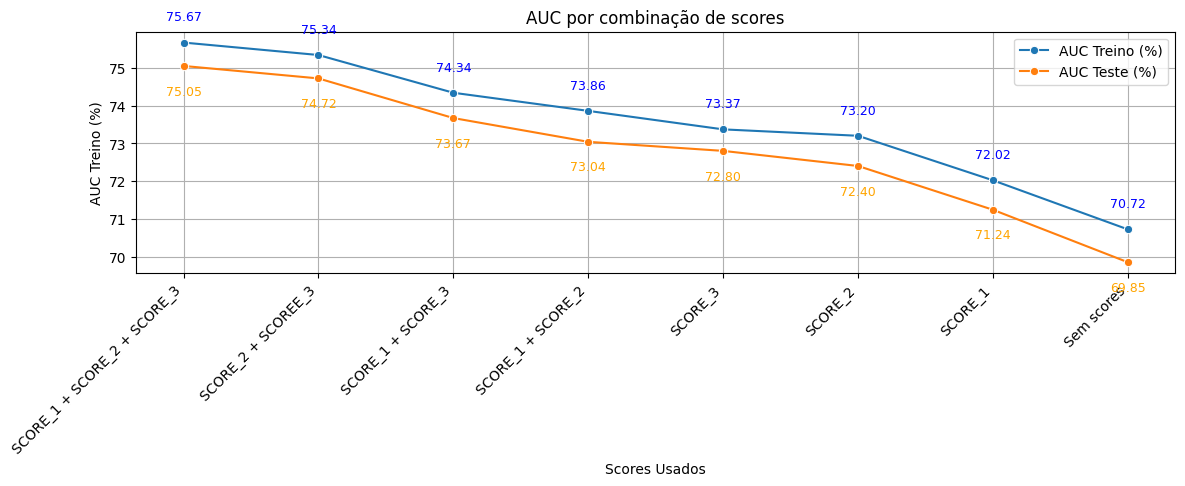

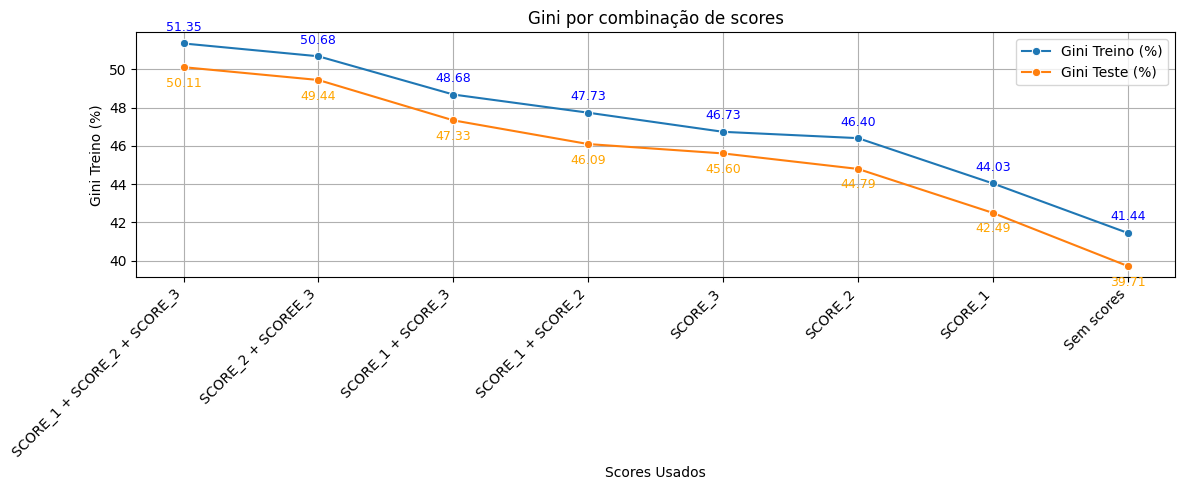

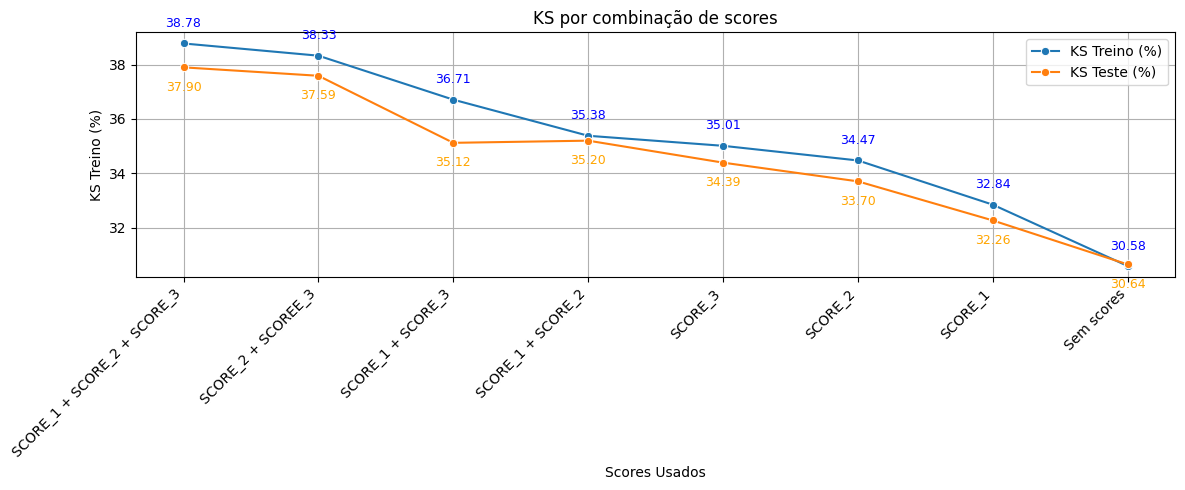

In [ ]:
# Gráficos das métricas

# Dados dos resultados
df_resultados = pd.DataFrame({
    'Scores Usados': [
        'SCORE_1 + SCORE_2 + SCORE_3',
        'SCORE_2 + SCOREE_3',
        'SCORE_1 + SCORE_3',
        'SCORE_1 + SCORE_2',
        'SCORE_3',
        'SCORE_2',
        'SCORE_1',
        'Sem scores'
    ],
    'AUC Treino (%)': [75.67, 75.34, 74.34, 73.86, 73.37, 73.20, 72.02, 70.72],
    'AUC Teste (%)':  [75.05, 74.72, 73.67, 73.04, 72.80, 72.40, 71.24, 69.85],
    'Gini Treino (%)': [51.35, 50.68, 48.68, 47.73, 46.73, 46.40, 44.03, 41.44],
    'Gini Teste (%)':  [50.11, 49.44, 47.33, 46.09, 45.60, 44.79, 42.49, 39.71],
    'KS Treino (%)':  [38.78, 38.33, 36.71, 35.38, 35.01, 34.47, 32.84, 30.58],
    'KS Teste (%)':   [37.90, 37.59, 35.12, 35.20, 34.39, 33.70, 32.26, 30.64]
})

# Configurações
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.figsize'] = (12, 5)

# Função para adicionar rótulos aos gráficos
def adicionar_rotulos(ax, x_labels, y_values, deslocamento, cor):
    for i, (x, y) in enumerate(zip(x_labels, y_values)):
        ax.text(i, y + deslocamento, f'{y:.2f}', ha='center', va='bottom' if deslocamento > 0 else 'top', fontsize=9, color=cor)

# Lista com os gráficos e suas colunas correspondentes
graficos = [
    ('AUC por combinação de scores', 'AUC Treino (%)', 'AUC Teste (%)'),
    ('Gini por combinação de scores', 'Gini Treino (%)', 'Gini Teste (%)'),
    ('KS por combinação de scores', 'KS Treino (%)', 'KS Teste (%)')
]

# Geração dos gráficos com rótulos
for titulo, col_treino, col_teste in graficos:
    plt.figure()
    ax = sns.lineplot(data=df_resultados, x='Scores Usados', y=col_treino, label=col_treino, marker='o')
    sns.lineplot(data=df_resultados, x='Scores Usados', y=col_teste, label=col_teste, marker='o')
    plt.title(titulo)
    plt.xticks(rotation=45, ha='right')

    # Adiciona rótulos
    x_labels = range(len(df_resultados))
    adicionar_rotulos(ax, x_labels, df_resultados[col_treino], deslocamento=0.5, cor='blue')
    adicionar_rotulos(ax, x_labels, df_resultados[col_teste], deslocamento=-0.5, cor='orange')

    plt.legend()
    plt.tight_layout()
    plt.show()
